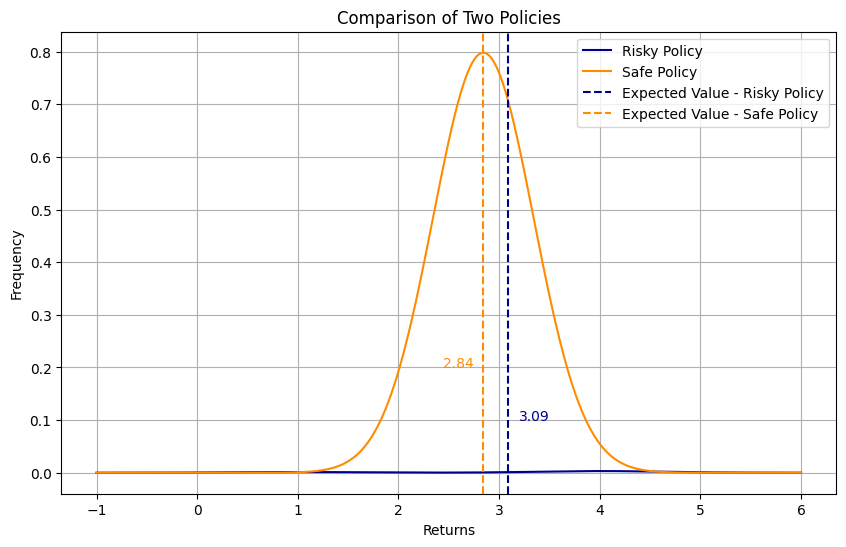

In [61]:
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, gaussian_kde

# Parameters for the two-mode distribution
mu_high, sigma_high = 4, 0.5  # High value mode
mu_low, sigma_low = 1, 0.5    # Low value mode
weights = [0.3, 0.7]          # Weights for low and high modes to shift expected value towards high mode

# Generating data for the two-mode distribution
data_high = np.random.normal(mu_high, sigma_high, int(1000*weights[1]))
data_low = np.random.normal(mu_low, sigma_low, int(1000*weights[0]))
data_two_mode = np.concatenate([data_high, data_low])
kde_two_mode = gaussian_kde(data_two_mode)

# Parameters for the unimodal distribution (safe policy)
expected_value_risk = (np.mean(data_high) * weights[1]) + (np.mean(data_low) * weights[0])
expected_value_safe = expected_value_risk - 0.25
mu_safe, sigma_safe = expected_value_safe, 0.5
x_safe = np.linspace(-1, 6, 1000)
y_safe = norm.pdf(x_safe, mu_safe, sigma_safe)

# Creating x-axis values for plotting
x = np.linspace(-1, 6, 1000)
y_pdf = kde_two_mode(x)
# Normalize the PDF to make sure it sums to 1
y_pdf /= np.sum(y_pdf)
# Create the CDF from the PDF
y_cdf = np.cumsum(y_pdf)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y_pdf, color='darkblue', label='Risky Policy')
plt.plot(x_safe, y_safe, color='darkorange', label='Safe Policy')
plt.axvline(expected_value_risk, color='darkblue', linestyle='--', label='Expected Value - Risky Policy')
plt.text(expected_value_risk + 0.1, 0.1, f'{expected_value_risk:.2f}', color='darkblue')
plt.axvline(expected_value_safe, color='darkorange', linestyle='--', label='Expected Value - Safe Policy')
plt.text(expected_value_safe - 0.4, 0.2, f'{expected_value_safe:.2f}', color='darkorange')
plt.title('Comparison of Two Policies')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipykernel_56129/4147700929.py:3: RuntimeWarning: invalid value encountered in power
  return (tau**beta) / ((tau**beta + (1 - tau)**beta)**(1/beta))


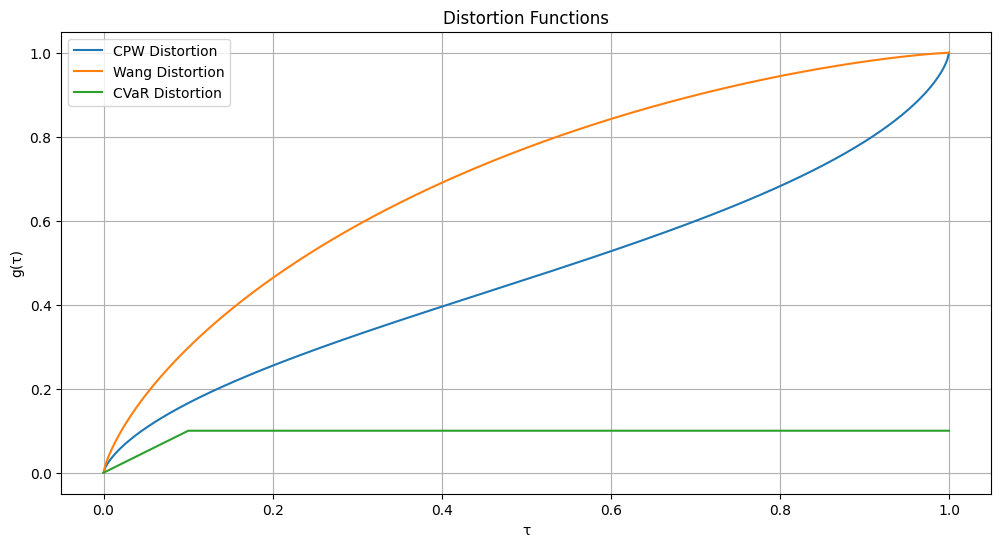

<function matplotlib.pyplot.show(close=None, block=None)>

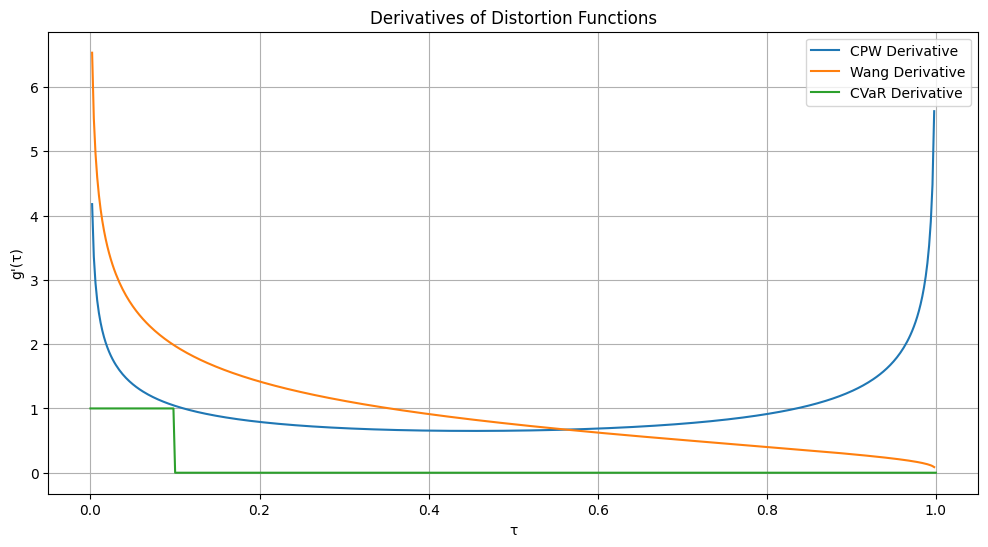

In [5]:
def cpw_distortion(tau, beta=0.71):
    """ Cumulative probability weighting (CPW) distortion function. """
    return (tau**beta) / ((tau**beta + (1 - tau)**beta)**(1/beta))

def wang_distortion(tau, beta=0.75):
    """ Wang distortion function. """
    return norm.cdf(norm.ppf(tau) + beta)

def cvar_distortion(tau, beta=0.1):
    """ Conditional Value at Risk (CVaR) distortion function. """
    return np.minimum(tau, beta)

def derivative(func, x, dx=1e-6):
    """ Calculate the derivative of a function at a given point. """
    return (func(x + dx) - func(x - dx)) / (2 * dx)

# Tau values for plotting
tau_values = np.linspace(0, 1, 500)

# Calculate distortion values
cpw_values = cpw_distortion(tau_values)
wang_values = wang_distortion(tau_values)
cvar_values = cvar_distortion(tau_values)

cpw_derivatives = derivative(cpw_distortion, tau_values)
wang_derivatives = derivative(wang_distortion, tau_values)
cvar_derivatives = derivative(cvar_distortion, tau_values)

# Plotting the distortion functions
plt.figure(figsize=(12, 6))
plt.plot(tau_values, cpw_values, label='CPW Distortion')
plt.plot(tau_values, wang_values, label='Wang Distortion')
plt.plot(tau_values, cvar_values, label='CVaR Distortion')
plt.title('Distortion Functions')
plt.xlabel('τ')
plt.ylabel('g(τ)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the derivatives of distortion functions
plt.figure(figsize=(12, 6))
plt.plot(tau_values, cpw_derivatives, label='CPW Derivative')
plt.plot(tau_values, wang_derivatives, label='Wang Derivative')
plt.plot(tau_values, cvar_derivatives, label='CVaR Derivative')
plt.title('Derivatives of Distortion Functions')
plt.xlabel('τ')
plt.ylabel("g'(τ)")
plt.legend()
plt.grid(True)
plt.show

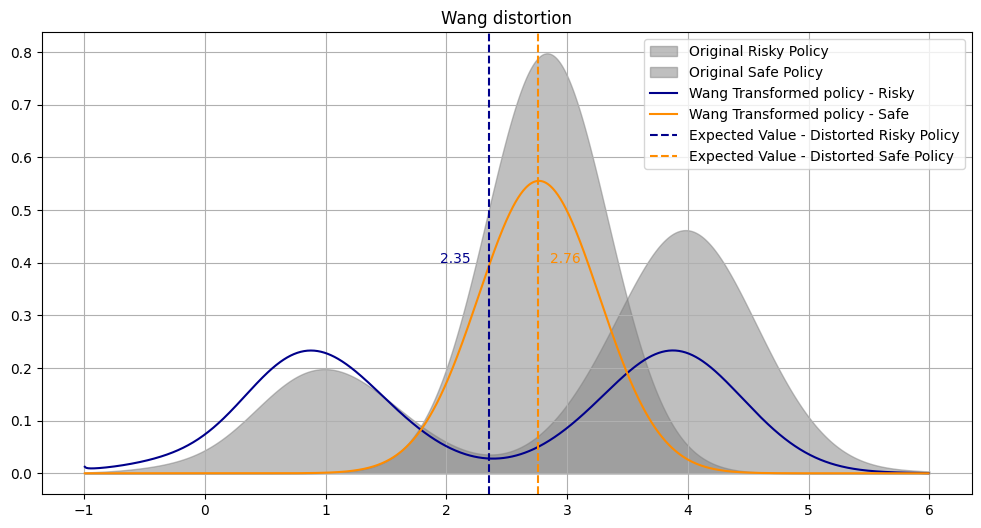

In [6]:
# Preparing data for plotting
x = np.linspace(-1, 6, 1000)
x_scaled = (x - min(x))/(max(x) -min(x))

# Applying transformations
wang_derivatives = derivative(wang_distortion, x_scaled)

wang_value_risky = wang_derivatives * kde_two_mode(x)
wang_value_safe = wang_derivatives * y_safe

new_mean_risky = np.mean(random.choices(x[1:-1], wang_value_risky[1:-1], k=10000))
new_mean_safe = np.mean(random.choices(x[1:-1], wang_value_safe[1:-1], k=10000))

# Wang Transform
plt.figure(figsize=(12, 6))
plt.fill_between(x, kde_two_mode(x), color='grey', alpha=0.5, label='Original Risky Policy')
plt.fill_between(x_safe, y_safe, color='grey', alpha=0.5, label='Original Safe Policy')
plt.plot(x, wang_value_risky, color='darkblue', label='Wang Transformed policy - Risky')
plt.plot(x, wang_value_safe, color='darkorange', label='Wang Transformed policy - Safe')
plt.axvline(new_mean_risky, color='darkblue', linestyle='--', label='Expected Value - Distorted Risky Policy')
plt.text(new_mean_risky - 0.4, 0.4, f'{new_mean_risky:.2f}', color='darkblue')
plt.axvline(new_mean_safe, color='darkorange', linestyle='--', label='Expected Value - Distorted Safe Policy')
plt.text(new_mean_safe + 0.1, 0.4, f'{new_mean_safe:.2f}', color='darkorange')
plt.title('Wang distortion')
plt.grid(True)
plt.legend()